<a href="https://colab.research.google.com/github/ASMITHAVARSHA/Time-Series-Analysis-of-TATA-Motors/blob/main/Time_Series_Analysis_of_TATA_Motors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 57.5 MB/s eta 0:00:00


In [ ]:
import pmdarima as pm
from pmdarima import auto_arima

In [ ]:
data=pd.read_excel('/content/TSA TATA motors dataset.xlsx')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [ ]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-04-03,328.000000,329.233337,325.033325,325.816681,265.631470,388749
2017-04-05,328.600006,330.333344,326.000000,326.466675,266.161377,464571
2017-04-06,326.666656,326.966675,322.700012,323.600006,263.824249,214923
2017-04-07,323.333344,334.799988,322.000000,330.649994,269.571930,775590
2017-04-10,331.666656,344.983337,331.666656,343.366669,279.939606,1598616


In [ ]:
data.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1422 entries, 2017-04-03 to 2022-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1422 non-null   float64
 1   High       1422 non-null   float64
 2   Low        1422 non-null   float64
 3   Close      1422 non-null   float64
 4   Adj Close  1422 non-null   float64
 5   Volume     1422 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 77.8 KB


In [ ]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1.422000e+03
mean,329.039065,334.456376,323.702742,328.305685,302.984695,1.238313e+06
std,193.533925,198.312874,189.155566,193.074067,192.377145,2.595505e+06
min,91.683334,98.983330,91.666664,94.433334,86.511253,3.810000e+04
25%,190.000000,192.075001,187.474995,189.854164,173.334671,2.668980e+05
50%,268.333344,269.666656,265.383331,266.883331,226.938401,5.158110e+05
75%,374.583328,384.500000,368.079171,376.279159,359.312615,1.098928e+06
max,1038.333374,1046.666626,975.000000,1010.150024,973.169189,3.651199e+07


In [ ]:
len(data)

1422

In [ ]:
data = data[['Close']]
data.head()

,Close
Date,
2017-04-03,325.816681
2017-04-05,326.466675
2017-04-06,323.600006
2017-04-07,330.649994
2017-04-10,343.366669


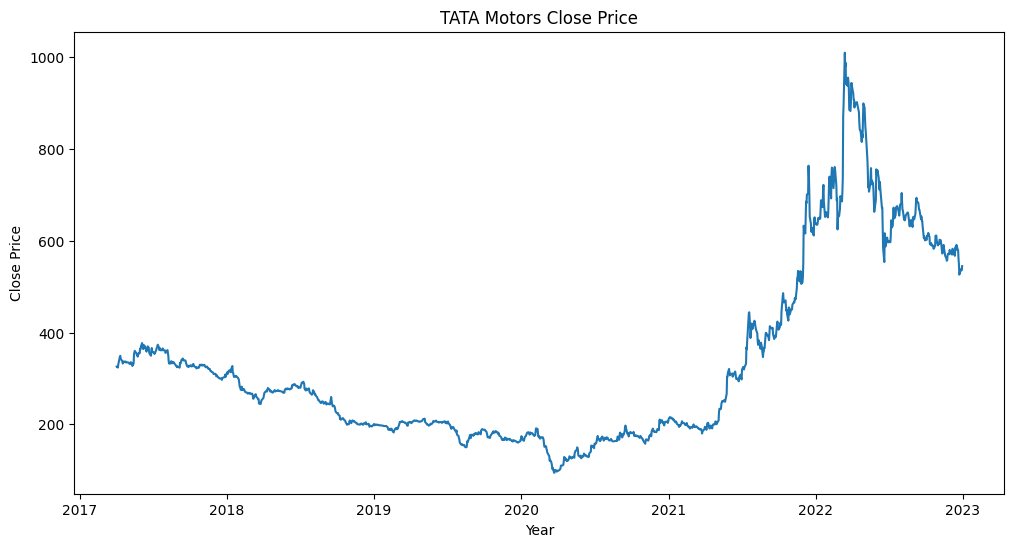

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data)
plt.title('TATA Motors Close Price')
plt.xlabel('Year')
plt.ylabel('Close Price')
plt.show()

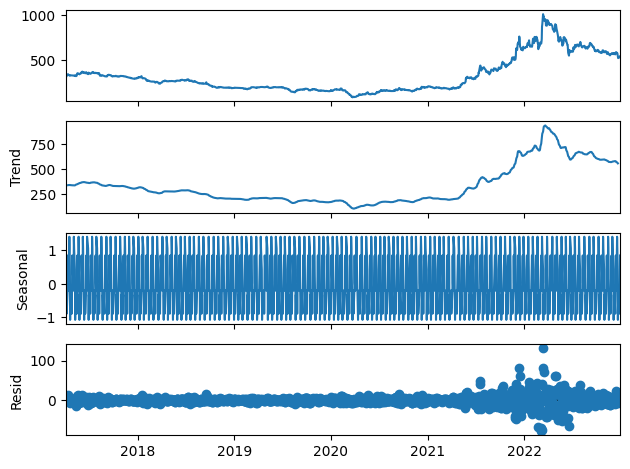

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(data, model='additive', period=12)
result.plot()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size], data.iloc[train_size:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

In [ ]:
print(len(train_scaled))
print(len(test_scaled))

1137
285


In [ ]:
scaled_data=scaler.fit_transform(data)
scaled_data

array([[0.25268006],
       [0.25338988],
       [0.25025936],
       ...,
       [0.4843929 ],
       [0.48215423],
       [0.49192801]])

In [ ]:
model_arima = pm.auto_arima(
    train_scaled,
    start_p=1,
    start_q=1,
    max_p=3,
    max_q=3,
    m=12,
    d=1,
    start_P=0,
    D=1,
    seasonal=True,
    trace=True,
    error_action='ignore',
    suppress_warnings=True
)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=9.46 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-5774.411, Time=0.44 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-6108.074, Time=1.31 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=5.18 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=-5784.211, Time=0.22 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=-6334.130, Time=3.89 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=12.24 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=8.06 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=-6315.117, Time=1.86 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=-6341.420, Time=7.08 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=-6112.855, Time=4.50 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=16.45 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=13.55 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=-6339.579, Time=9.85 sec
 ARIMA(2,1,1)(2,1,0)[12]             :

In [ ]:
# Forecasting using Auto ARIMA
n_periods = len(test)  # Forecast for the test period
forecast, conf_int = model_arima.predict(n_periods=n_periods, return_conf_int=True)

In [ ]:
# Create a DataFrame for the forecast
forecast_index = pd.date_range(start=data.index[train_size + time_step + 1], periods=n_periods, freq='B')
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=['Forecast'])

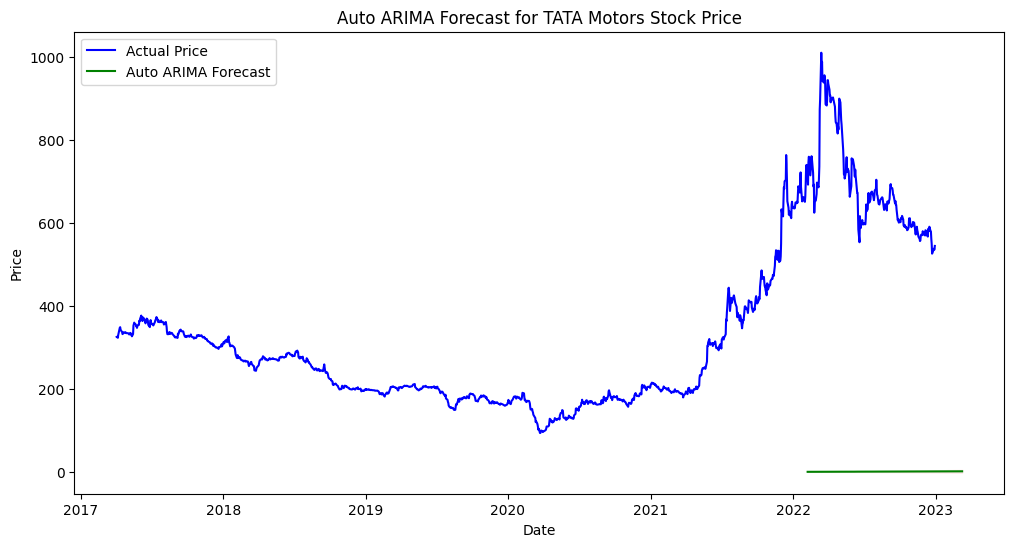

In [ ]:
# Plotting the forecast
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Actual Price', color='blue')
plt.plot(forecast_df, label='Auto ARIMA Forecast', color='green')
plt.fill_between(forecast_index, conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3)
plt.title('Auto ARIMA Forecast for TATA Motors Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
# Prepare the data for LSTM
def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), 0])
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

In [ ]:
time_step = 60  # Using 60 previous days to predict the next day
X_train, y_train = create_dataset(train_scaled, time_step)
X_test, y_test = create_dataset(test_scaled, time_step)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

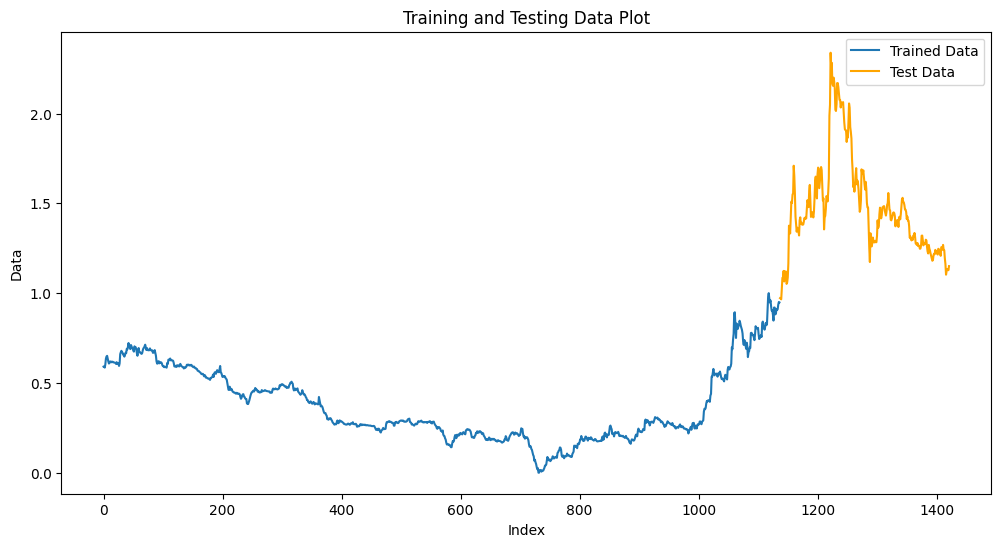

In [ ]:
plt.figure(figsize=(12,6))
plt.title("Training and Testing Data Plot")
plt.xlabel("Index")
plt.ylabel("Data")
plt.plot(train_scaled, label='Trained Data')
plt.plot(range(len(train_scaled), len(train_scaled) + len(test_scaled)), test_scaled, label='Test Data', color='orange')
plt.legend()
plt.show()

In [ ]:
# Build LSTM model
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=30, batch_size=32)

Epoch 1/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0016
Epoch 2/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0017
Epoch 3/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - loss: 0.0017
Epoch 4/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 0.0024
Epoch 5/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0016
Epoch 6/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0015
Epoch 7/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0014
Epoch 8/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - loss: 0.0013
Epoch 9/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.0016
Epoch 10/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0017
Epoch 11/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0016
Epoch 12/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.0016
Epoch 13/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - loss: 0.0016
Epoch 14/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.0015
Epoch 15/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0012
Epoc

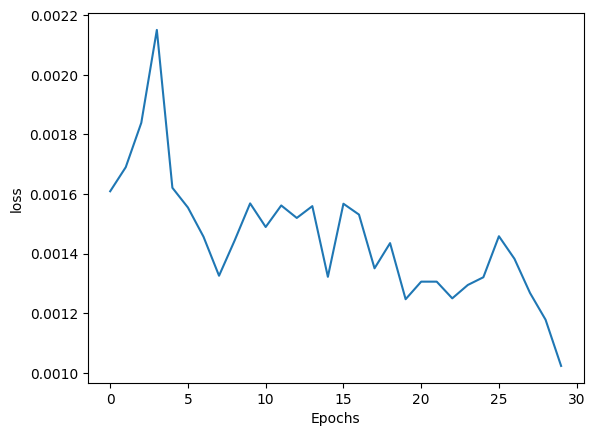

In [ ]:
loss_per_epoch=model.history.history['loss']
plt.plot(loss_per_epoch)
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.show()

In [ ]:
print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 91,955 (359.20 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 61,304 (239.47 KB)

None


In [ ]:
# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [ ]:
# Inverse transform to get actual prices
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [ ]:
print(len(train_predict))
print(len(test_predict))

1076
224


In [ ]:
from sklearn.metrics import mean_squared_error
train_rmse = np.sqrt(mean_squared_error(y_train, train_predict))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predict))
print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')

Train RMSE: 464.4885581065039
Test RMSE: 1443.2761365766723


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━

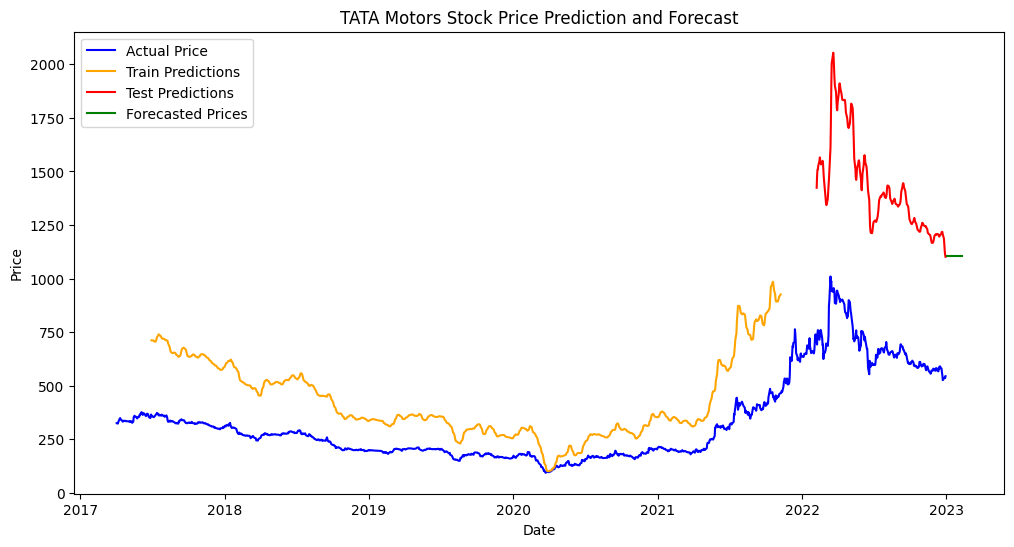

In [ ]:
# Number of days into the future we want to forecast
forecast_days = 30
forecasted_values = []

# Forecast future values
for _ in range(forecast_days):
    last_data = last_data.reshape((1, time_step, 1))
    predicted_value = model.predict(last_data)
    forecasted_value = scaler.inverse_transform(predicted_value)
    forecasted_values.append(forecasted_value[0][0])

# Generate future dates
future_dates = pd.date_range(start=data.index[-1], periods=forecast_days + 1, freq='B')[1:]

# Plot the forecasted values
plt.figure(figsize=(12, 6))

# Plot actual prices
plt.plot(data.index, data['Close'], label='Actual Price', color='blue')

# Plot train and test predictions
plt.plot(data.index[time_step:time_step + len(train_predict)], train_predict, label='Train Predictions', color='orange')
plt.plot(data.index[train_size + time_step + 1:train_size + time_step + 1 + len(test_predict)], test_predict, label='Test Predictions', color='red')

# Plot forecasted prices
plt.plot(future_dates, forecasted_values, label='Forecasted Prices', color='green')
plt.title('TATA Motors Stock Price Prediction and Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
